**<center>Universidade Federal do Pará</center>**

**Curso:** Engenharia Elétrica

**Disciplina:** Laboratório De Sistemas De Controle

**Docente:** Cleison Daniel Silva

**Discentes:** 

Hilda Beatriz Viana De Oliveira - 201933940028

Ivanildo dos Santos Bento - 201833940019      

Natã Nazareno Brito Barbosa - 201933940016

**Cidade:** Tucuruí/PA                  
**Turma:** 2019

# Controlador Proporcional
Função de transferência do controlador, 

$$G_c (s) = \frac{U(s)}{E(s)} = K_p $$

Logo o sinal de controle é proporcional ao erro de controle.

No domínio de tempo discreto, temos, 

$$u(k) = K_p e(k)$$

Lembre-se de que o controlador foi projetado para um ponto de operação, logo para calcular o erro de contorle, deve remover o valor correspondente ao ponto de operação na saída, 

$y(k)$ = sinal_medido - valor_ponto_operação
$$e(k) = r(k) - y(k)$$

In [1]:
# BiBLIOTECAS
import control as ct
import serial 
import numpy as np
import matplotlib.pyplot as plt
import time as t
import pandas as pd
from scipy.signal import square,sawtooth

Controle Proporcional $K_p$:

Esse experimento teve o intuito de implementar o controlador $K_p$, o qual foi calculado anteriormente e apartir disso, analisar na bancada motor gerador os resultados obtidos.


Estabelecendo conexão.

Iniciando coleta.

Fim da coleta.
media= -0.0625

Período real: 0.025339336395263673
Nivel_DC: 3.0645666666666664


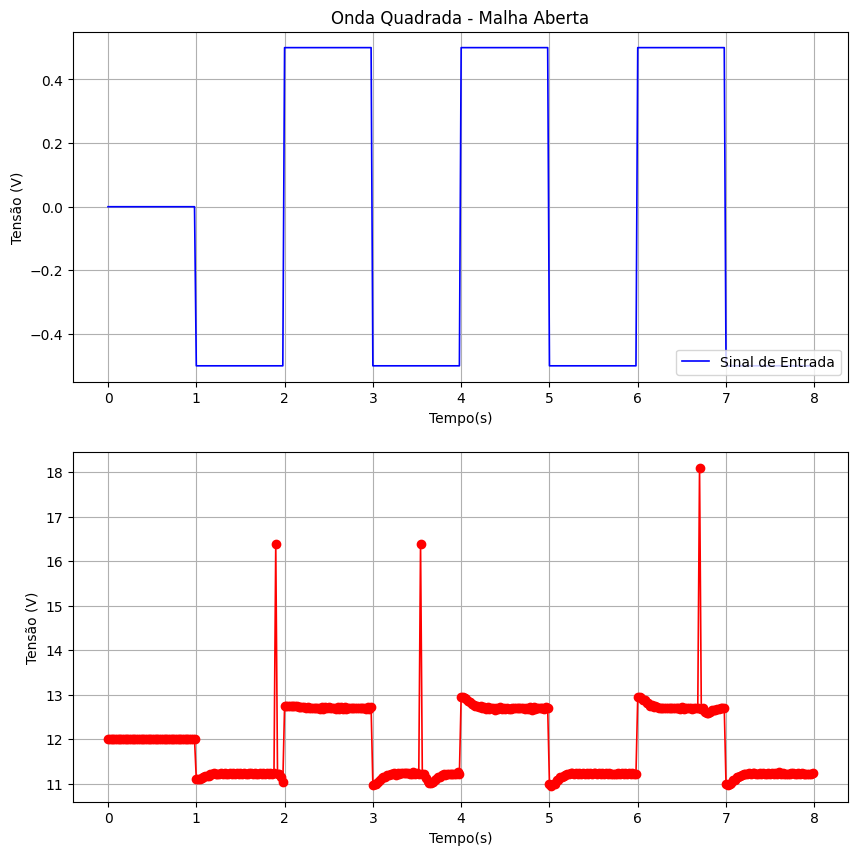

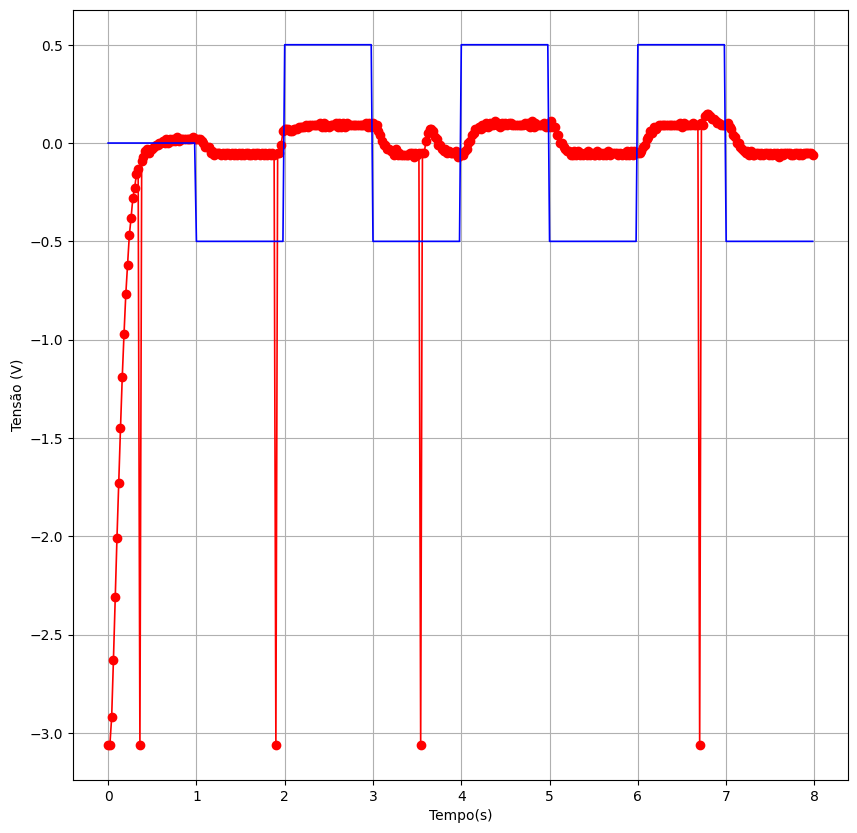

In [5]:

#############################################################################################################################################

amplitude_maxima = 15                                                             # Tensão da bancada

numAmostras = 400                             
tempo = np.zeros(numAmostras)                    
y = np.zeros(numAmostras)                      

Ts = 0.02                                          

fre = 0.5                                                                         # Frequência 
Amplitude = 0.5                                                                   # Amplitude
ponto_de_operacao = 12                                                            # Ponto de operação

nivel_dc_saida = 3.06                                                             # Nível dc   


# a = 2*np.ones(int(numAmostras/2))
# b = 4*np.ones(int(numAmostras/2))
# u = np.concatenate([a,b]) #degrau
r = np.zeros(numAmostras)                    
u = np.zeros(numAmostras)                    

toc = np.zeros(numAmostras)                     
###################################################################################################################################################                     


for n in range(numAmostras):                                                                 
  r[n] = Amplitude*square(2*np.pi*fre*n*Ts) #+ ponto_de_operacao
  #r[n] = Amplitude*sawtooth(2*np.pi*fre*n*Ts) + setpoint
  #r[n] = Amplitude*np.sin(2*np.pi*fre*n*Ts) + setpoint
  #r[n] = u[n]
    
print('\nEstabelecendo conexão.')                                      
conexao = serial.Serial(port='COM10', baudrate=9600, timeout=0.005)                        

t.sleep(1)                                                       
print('\nIniciando coleta.')                                                  

##_____________ Loop principal de controle _____________##
nivel_dc_entrada = ponto_de_operacao                                                                                                                            
Kp = 1.714                                                                        # VALOR DO KP
for n in range(numAmostras):                                               
    tic = t.time()                                               

    if (conexao.inWaiting() > 0):                                     
        y[n] = conexao.readline().decode()                                                     

    # remove o nivel_dc_saida
    sinal_medido = y[n] - nivel_dc_saida                                                            
    
    # calcula o erro
    e = r[n] - sinal_medido                                     

    # primeiras 50 amostras
    if (n<50):                                           
      u[n] = nivel_dc_entrada                                           
      r[n] = 0.0                                                    
    else:                                                                                                                          
      u[n] = (Kp*e) + nivel_dc_entrada                                               

    if (u[n] > amplitude_maxima):                                    
      sinal_PWM = 255                                 
    else:                                                              
      sinal_PWM = ((u[n])*255)/amplitude_maxima                                                 

    # sinal_PWM deve ser um número inteiro entre 0 e 255                                                     
    conexao.write(str(round(sinal_PWM)).encode())                                                                   
    
    t.sleep(Ts)                                                        
    
    if (n > 0):                                                   
        tempo[n] = tempo[n-1] + Ts                         
    toc[n] = t.time() - tic                        

conexao.write('0'.encode())                                            
print('\nFim da coleta.')                                               
conexao.close()                                  

print('media=',np.mean(r))                                                                    

print('\nPeríodo real:', np.mean(toc))                         
print('Nivel_DC:', np.mean(y[tempo>2]))                                              

plt.figure(figsize=(10,10))                                         
plt.subplot(211)                                                                  
plt.plot(tempo,r,'-b',linewidth=1.2)                                         
plt.xlabel('Tempo(s)')                                                       
plt.ylabel('Tensão (V)')                        
plt.grid()                                                                         
plt.title('Onda Quadrada - Malha Aberta')                                          
plt.legend(loc='lower right', labels=('Sinal de Entrada','Sinal de Saída'))                                
                        
plt.subplot(212)                             
#plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)                         
plt.plot(tempo,u,'-ro',linewidth=1.2)                   
plt.xlabel('Tempo(s)')                        
plt.ylabel('Tensão (V)')                                                            
plt.grid()                                                     
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()                                                                   
                
plt.figure(figsize=(10,10))                                 
#plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)
plt.plot(tempo,y-nivel_dc_saida,'-ro', tempo, r,'-b',linewidth=1.2)                                   
plt.xlabel('Tempo(s)')                                                                                                                                           
plt.ylabel('Tensão (V)')                                                                      
plt.grid()                                                                    
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()                                    
              
#dados=np.stack((tempo,r,y, u),axis=-1)                                                                                                                   
#np.savetxt("C:/Users/User/Documents/2023.2/Laboratório de Controle/08-05/dados/dadoskp.csv", dados, delimiter=";")                                     


O segundo gráfico em vermelho plota o sinal de controle e o terceiro gráfico plota a saída em função da referência!

# Controlador Proporcional:

## Parâmetros utlizados:
$$K_m = 0.25 $$
$$\tau = 0.012 $$
$$u_{80\%} = 0.25 $$
$$y_{80\%} = 3.06 $$
$$K_p = 1.714$$


Logo, pela coleta dos dados analisados nos gráficos a cima, é observável no sinal, que a constante de tempo do sinal de saída é menor quando adicionado o $K_p$.  

# COMPARAÇÃO DOS DADOS

Dados da simulação do controlador proporcional:

Sistema em Malha Aberta:
 
   0.25
-----------
0.102 s + 1

Sistema em Malha Fechada:
 
    0.4285
---------------
0.102 s + 1.429



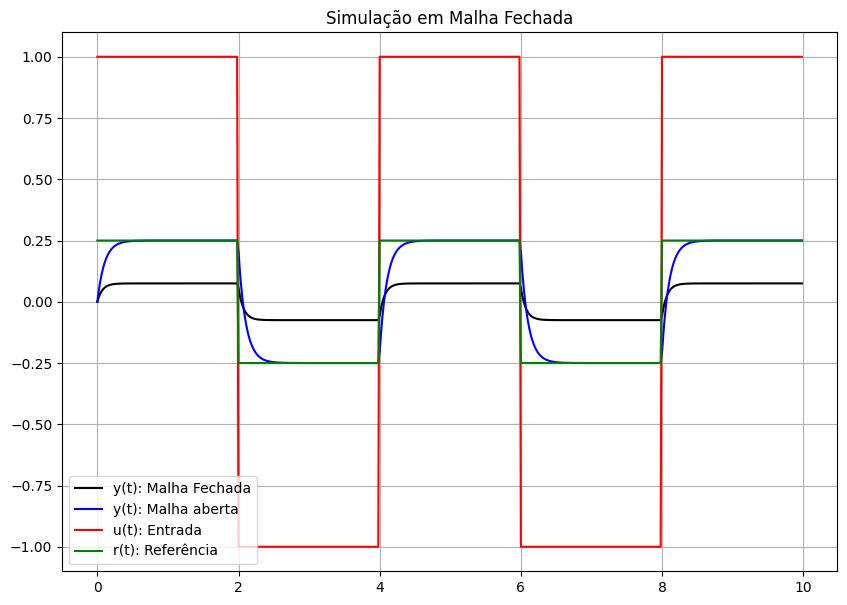

In [24]:
N = 500
Amplutude = 1
freq = 0.25
Fs = 50
Ts =1/Fs

n = np.arange(0,N)
tempo = n*Ts

sinal_de_entrada = Amplutude*square(2*np.pi*freq*n*Ts)

sinal_de_referencia = 0.25*Amplutude*square(2*np.pi*freq*n*Ts)


# Sistema em Malha Aberta 
Km = 0.25
tau = 0.102

NUM = [Km]
DEN = [tau, 1]

G = ct.tf(NUM,DEN)

_, y_malha_aberta = ct.forced_response(G, T = tempo, U = sinal_de_entrada) 


print("Sistema em Malha Aberta:\n", G)

# Controlador Propocional 

Kp = 1.714

Gc = Kp

# Sistema em Malha Fechada

H = ct.feedback(Gc*G, 1, sign = -1)
print("Sistema em Malha Fechada:\n", H)

# Simulação do Sistema em Malha Fechada para Onda Quadrada 

_, y_malha_fechada = ct.forced_response(H, T = tempo, U = sinal_de_referencia) 

# Simulação do Sistema em Malha Fechada para Onda Quadrada 

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k', label = "y(t): Malha Fechada")
plt.plot(tempo, y_malha_aberta, '-b', label ="y(t): Malha aberta")
plt.plot(tempo, sinal_de_entrada, '-r', label ="u(t): Entrada")
plt.plot(tempo, sinal_de_referencia, '-g', label ="r(t): Referência")
plt.title('Simulação em Malha Fechada')
plt.legend()
plt.grid()
plt.show()

Relação dos dados da simulação x real:

In [9]:
#path = "/content/drive/MyDrive/lab.de.controle/03.04/50%/"
#C:\Users\User\Documents\2023.2\Laboratório de Controle\08-05

path = "C:/Users/User/Documents/2023.2/Laboratório de Controle/08-05/"
ddS = pd.read_csv(path + "dadoskp.csv", sep=';')

In [10]:
x1 = ddS.to_numpy()
t = np.array(x1[:,0])

<function matplotlib.pyplot.show(close=None, block=None)>

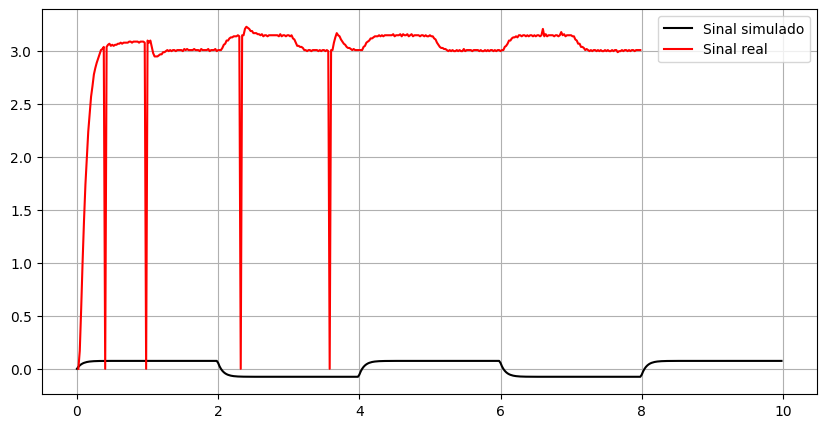

In [28]:
x1 = ddS.to_numpy()
t = np.array(x1[:,0])
si_entrada = np.array(x1[:,1])
si_saida = np.array(x1[:,2])
toc = np.array(x1[:,2])

nivel_dc_saida = 3.06

plt.figure(figsize=(10, 5))
plt.plot(tempo, y_malha_fechada, '-k', label = "Sinal simulado")
#plt.plot(t, si_entrada, c = 'b', label = "Sinal de entrada")
plt.plot(t, si_saida, c = 'r', label = "Sinal real")
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

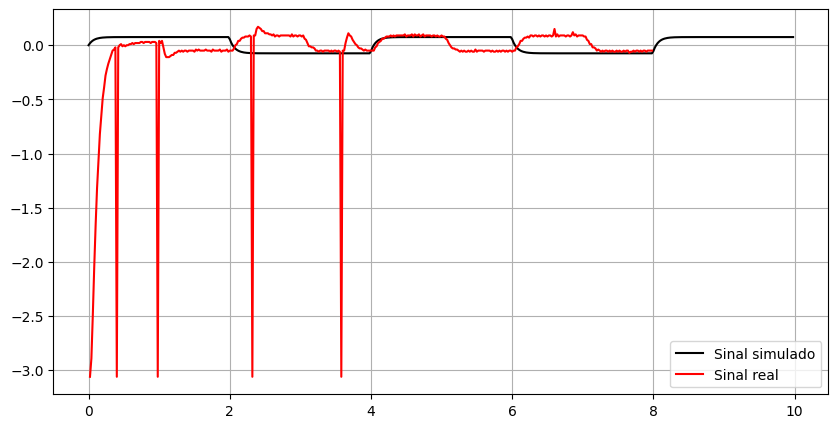

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(tempo, y_malha_fechada, '-k', label = "Sinal simulado")
#plt.plot(t, si_entrada, c = 'b', label = "Sinal de entrada")
plt.plot(t, si_saida-nivel_dc_saida, c = 'r', label = "Sinal real")
plt.legend()
plt.grid()
plt.show

A partir da análise observada, pode-se concluir que o controlador $Kp$ não mostrou eficiência, pois, o sistema analisado precisa de dois polos e por enquanto o estudo baseou-se em uma análise de sistema de primeira ordem. 